In [1]:
# Decision Tree Classification
# -Type of ML model that makes predictions by repeatedly splitting data into smaller
# and more specific groups based on simple yes/no question.
# -A decision tree is a flowchart-like tree structure.
# -Called tree because it has root node(top),branches,internal nodes,leaf nodes(final predictions)
# -topmost node is a decision tree is known as root node.
# -used a sequence of if-else conditions.
# -can handle high dimensional data with good accuracy.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Upload files
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
pima = pima.drop(0)        # drop first row
pima = pima.reset_index(drop=True)   # optional: clean index

In [5]:
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6796536796536796


In [10]:
!apt-get install graphviz
!pip install pydotplus
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


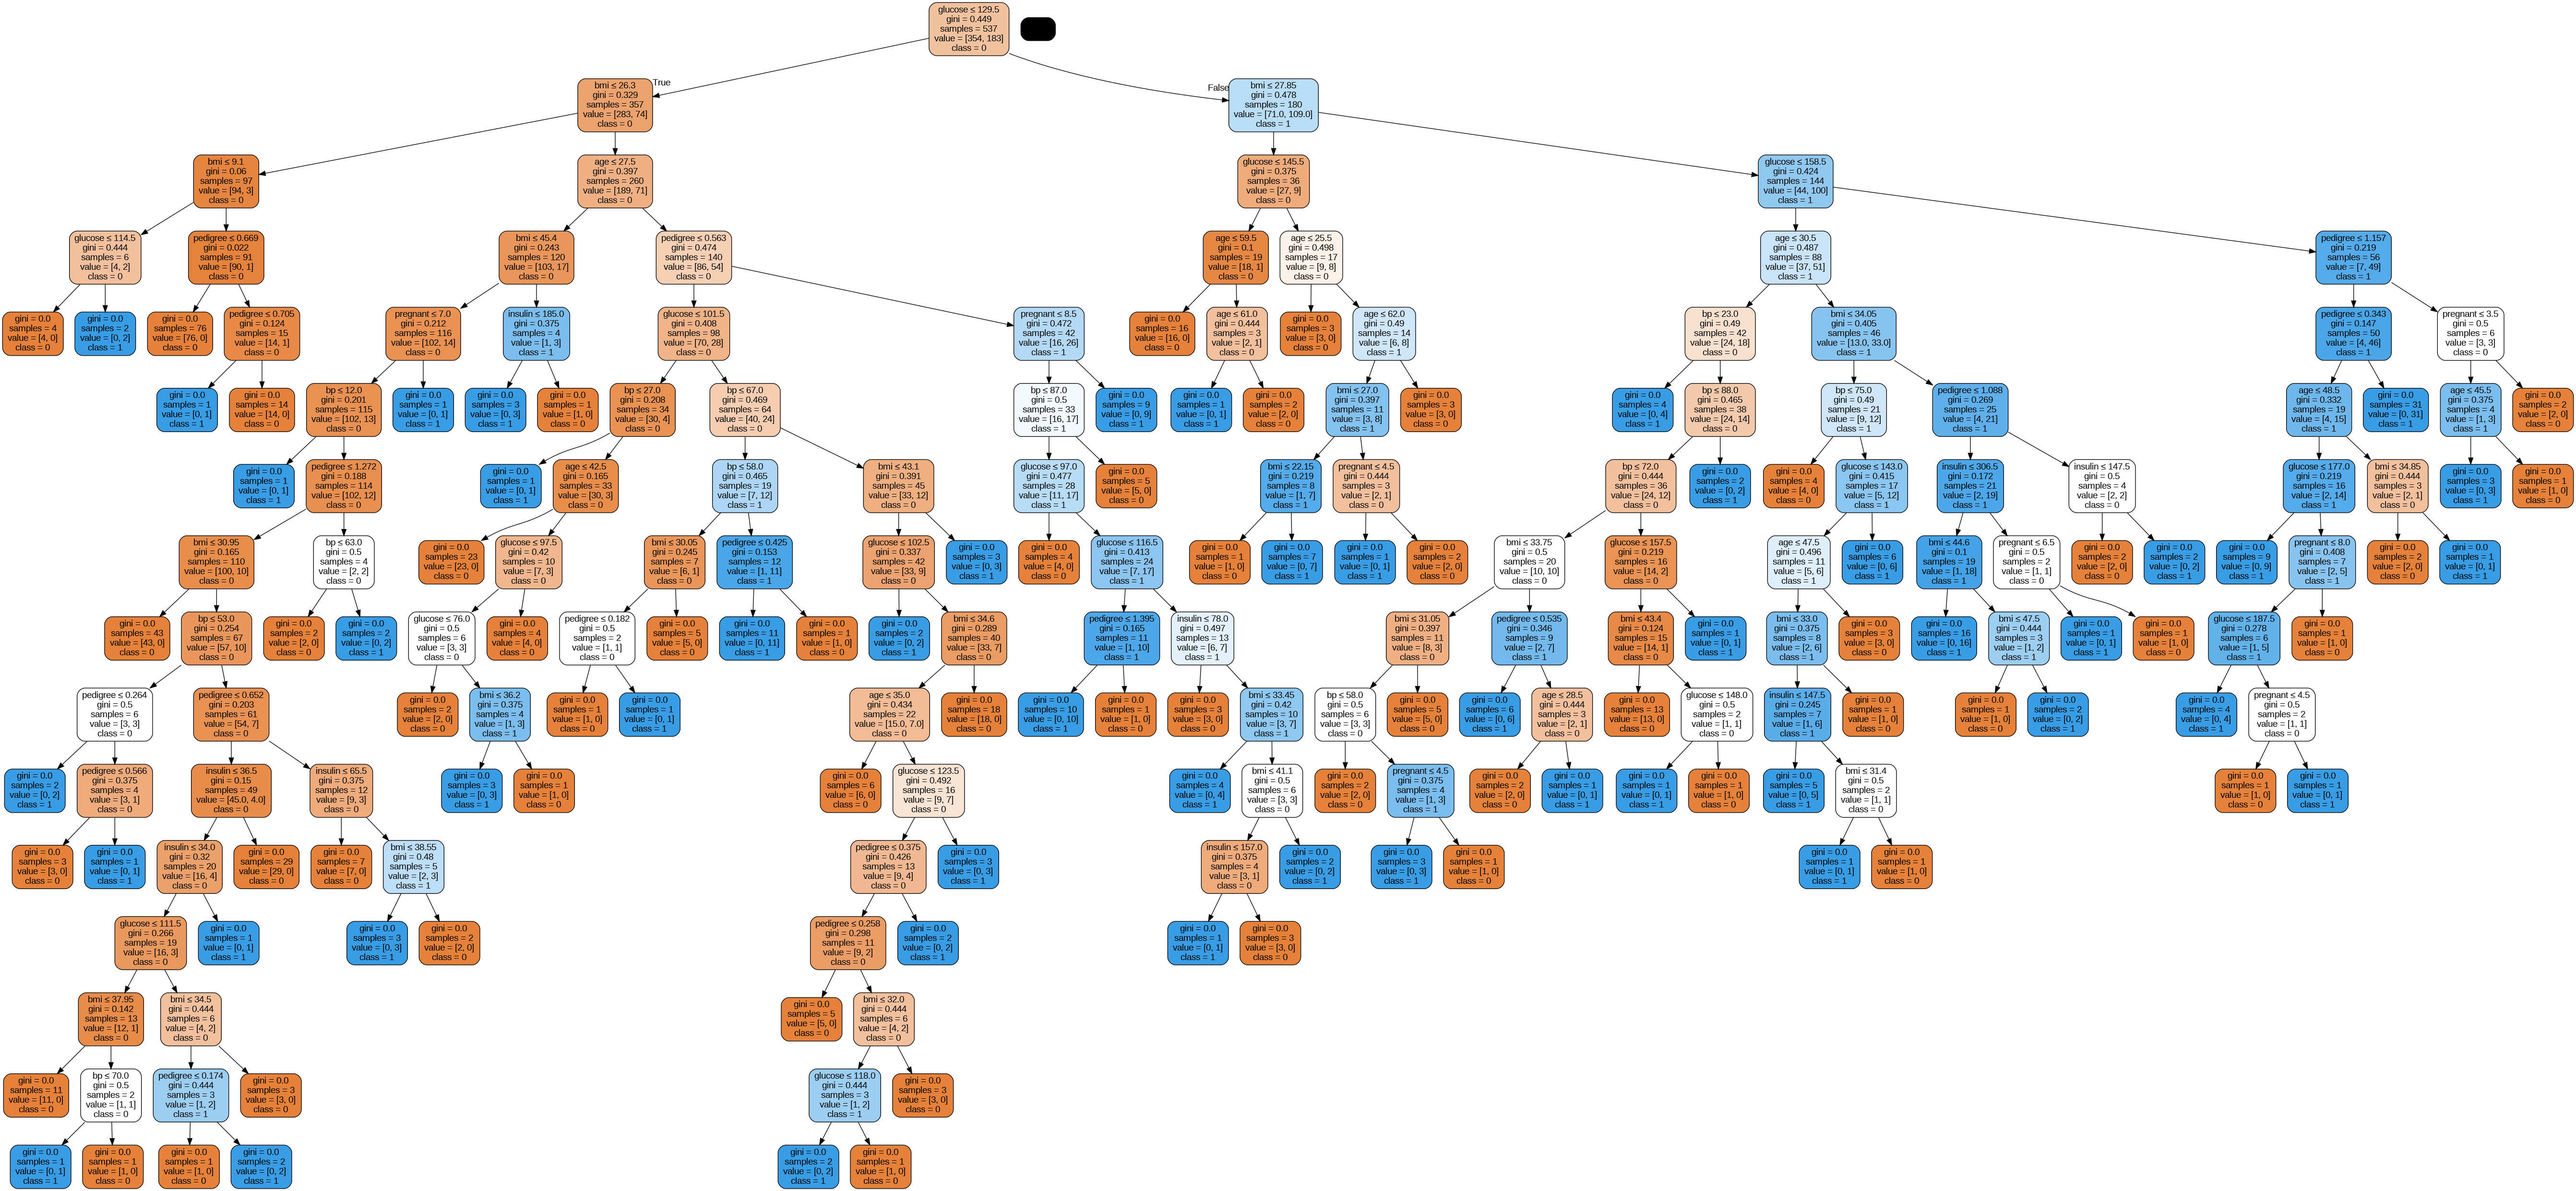

In [11]:
# Visualizing Decision

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [12]:
# mynote:
# glucose<=129.5    -reading
# gini=0.449        -impurity(lower=purer)
# samples=537       -total sample
# value=[354,183]   - 354=class 0(non-diabetes),183 =class 1(diabetes)
# class=0           - non-diabetes

# Compute gini:
# Gini=1-(p0**2 + p1**2)
# p0=354/537=0.6592
# p1=183/537=0.3407
# Gini= 1-(0.6592**2 + 0.3407**2)
# Gini= 1-(0.4345+0.1161)
#     = 1-0.5506
#     = 0.4494

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


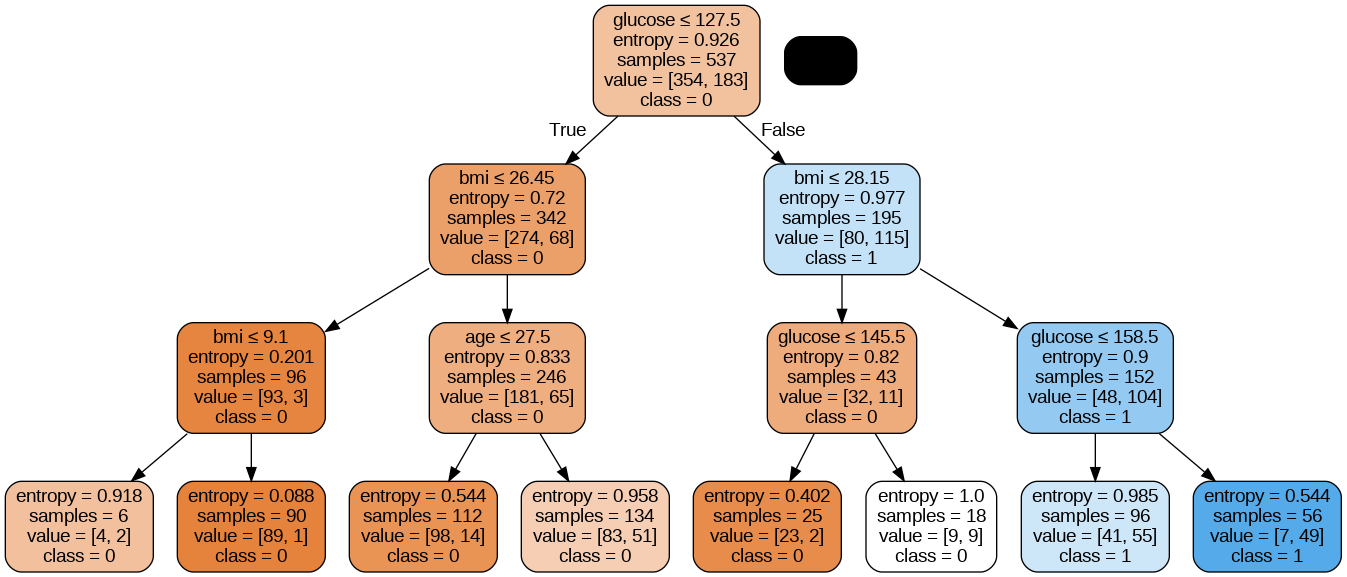

In [14]:
# Visualizing Decision Tree

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [15]:
# myNote:
# Glucose <= 127.5    -reading
# Entropy=0.926       -measure of impurity or disorder in DecisionTree
# samples = 537       -537 people reached this node
# value = [354,183]  -[354 count non diabetes,183 count diabetes]
# class = 0           -0 or 1
# compute Entropy:
# p0=354/537=0.6592
# p1=183/537=0.3407
# Entropy = -p0 log2(p0)-p1 log2(p1)
#         = -0.6592 log2(0.6592) -0.3407 log2(0.3407)
#         = -0.6592*(-0.6012)-0.3407*(-1.5534)
#         = 0.3963 + 0.5292
#         = 0.9255